# Web-scraping: сбор данных из баз данных и интернет-источников

*Алла Тамбовцева*

## Практикум 1.2. Парсинг с `BeautifulSoup`: тэги и атрибуты

Мы уже немного познакомились со структурой html-страниц и поиском информации по тэгам, теперь попробуем выгрузить информацию из более интересной страницы, а точнее, с сайта [nplus1.ru](https://nplus1.ru/). Наша задача – выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в файл Excel.

Для работы нам снова понадобится модуль `requests` для отправки запросов, для «подключения» к странице и получения ее содержимого в виде строки, и функция `BeautifulSoup` из библиотеки `bs4` для удобного поиска по полученной строке:

In [1]:
import requests
from bs4 import BeautifulSoup

Сохраним ссылку на главную страницу в переменную `main` и отправим запрос к ней с помощью функции `get()` из `requests`:

In [2]:
main = "https://nplus1.ru/"
page = requests.get(main)

Заберём исходный код страницы и преобразуем строку с ним в объект `BeautifulSoup`:

In [3]:
soup = BeautifulSoup(page.text)

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Найдем кусочки кода HTML, соответствующие всем ссылкам на главной странице сайта:

In [4]:
links_raw = soup.find_all("a") 
links_raw[10:20]  # несколько штук для примера

[<a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=880">Астрономия</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=768">Генетика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=890">Математика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=871">Космонавтика</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=876">Археология</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=775">Нейронауки</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=767">На мышах</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search?tags=771">Звук</a>,
 <a class="hover:underline transition-colors duration-75" href="https://nplus1.ru/search

Каждый элемент возвращаемого списка имеет тип `BeautifulSoup` и структуру, очень похожую на словарь. Например, ссылка `<a class="hover:underline transition-colors duration-75" href="/search/empty/768">Генетика</a>` изнутри выглядит как словарь следующего вида:

    {'href' : '/search/empty/768', 
     'class' : 'hover:underline transition-colors duration-75'}.
    
Как мы помним, значение по ключу из словаря можно вызвать с помощью метода `.get()`. Давайте извлечем значения по ключу `href` из каждого элемента списка `links`:

In [5]:
links = [li.get("href") for li in links_raw] 
links[10:20]  # несколько штук для примера

['https://nplus1.ru/search?tags=880',
 'https://nplus1.ru/search?tags=768',
 'https://nplus1.ru/search?tags=890',
 'https://nplus1.ru/search?tags=871',
 'https://nplus1.ru/search?tags=876',
 'https://nplus1.ru/search?tags=775',
 'https://nplus1.ru/search?tags=767',
 'https://nplus1.ru/search?tags=771',
 'https://nplus1.ru/search?tags=772',
 'https://nplus1.ru/search?tags=778']

Ссылок в списке выше много. Но нам нужны только новости – ссылки, которые начинаются с `https://nplus1.ru/news`. Создадим пустой список `news` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [6]:
news = []
for li in links:
    if "https://nplus1.ru/news/" in li:
        news.append(li)

In [7]:
news[0:10]

['https://nplus1.ru/news/2024/01/26/ingenuity-its-done',
 'https://nplus1.ru/news/2024/01/27/buruli-ulcer',
 'https://nplus1.ru/news/2024/01/27/dream-job-for-ai',
 'https://nplus1.ru/news/2024/01/27/stay-slim',
 'https://nplus1.ru/news/2024/01/27/ants-lions-zebras',
 'https://nplus1.ru/news/2024/01/26/jezero-gpr-observations',
 'https://nplus1.ru/news/2024/01/26/lisa-go',
 'https://nplus1.ru/news/2024/01/26/hd-88986-b',
 'https://nplus1.ru/news/2024/01/26/buprenorphine-or-methadone',
 'https://nplus1.ru/news/2024/01/26/dolphin-vs-manatee']

Первая ссылка ведет не совсем на новость, скорее, на объявление, поэтому давайте ее уберем:

In [8]:
news = news[1:] 

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `news` в цикле. Посмотрим на новость с индексом 0, у вас может быть другая, новости обновляются.

In [9]:
link0 = news[0]
print(link0)

https://nplus1.ru/news/2024/01/27/buruli-ulcer


### Задача 1

Отправьте запрос к странице по ссылке `link0` с одной новостью, получите результат в виде объекта `BeautifulSoup` и сохраните его как `soup0`.

In [10]:
page0 = requests.get(link0)
soup0 = BeautifulSoup(page0.text)

### Задача 2

Найдите заголовок новости и сохраните его в переменную `title`.

In [11]:
title = soup0.find("title").text
title = title.replace("\xa0", " ") # заменяем неразрывный пробел на обычный
print(title)

Австралийских комаров-кусак обвинили в распространении возбудителя язвы Бурули. До этого механизм передачи инфекции оставался неизвестным


### Задача 3

Найдите имя автора новости и дату её публикации. Сохраните их в `author` и `date` соответственно.

In [12]:
# находим все тэги meta
soup0.find_all("meta")

[<meta charset="utf-8"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="#f26e40" name="msapplication-TileColor"/>,
 <meta content="#ffffff" name="theme-color"/>,
 <meta content="8c90b02c84ac3b72" name="yandex-verification"/>,
 <meta content="b419949322895fc9106e24ed01be58ac" name="pmail-verification"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" name="description"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:site_name"/>,
 <meta content="Австралийских комаров-кусак обвинили в распространении возбудителя язвы Бурули" property="og:title"/>,
 <meta content="https://minio.nplus1.ru/app-images/882118/65b4fc70c42d5_cover_share.png" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2024/01/27/buruli-ulcer" property="og:url"/>,
 <meta content="N + 1 — главное издание о науке, технике и технологиях" property="og:description"/>,
 <meta content="article" property="og:type"

In [13]:
# уточняем критерии поиска
# указываем значение атрибута itemprop

soup0.find("meta", {"itemprop" : "datePublished"})

<meta content="2024-01-27" itemprop="datePublished"/>

In [14]:
# забираем содержимое из атрибута content
# по анологии со ссылкой и href

soup0.find("meta", {"itemprop" : "datePublished"}).get("content")

'2024-01-27'

In [15]:
# все вместе и аналогично для автора

date = soup0.find("meta", {"itemprop" : "datePublished"}).get("content")
author = soup0.find("meta", {"name" : "mediator_author"}).get("content")

print(date, author)

2024-01-27 Слава Гоменюк


### Задача 4

Найдите сложность новости и рубрики, к которым она относится. Сохраните сложность в переменную `diffc`. Рубрики сначала можно сохранить в список, а затем его элементы объединить в одну строку `rubs`.

**Подсказка:** чтобы упростить себе жизнь, найдите сначала раздел (`div`), в котором на странице хранится дата и время публикации, сложность и рубрики, а затем выполняйте поиск в рамках этого раздела.

In [16]:
# находим подходящий фрагмент кода

div = soup0.find("div",
                 {"class" : "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})

In [17]:
# находим внутри этого фрагмента четвертый элемент с тэгом span
# в нем хранится сложность

diffc = div.find_all("span")[3].text
print(diffc) # тип пока текстовый, не числовой

3.2


In [18]:
# находим рубрики – все элементы после сложности, может быть несколько
# извлекаем текст рубрик
# склеиваем в одну строку

rubs_raw = div.find_all("span")[4:]
rubs_clean = [r.text for r in rubs_raw]
rubs = ", ".join(rubs_clean)
print(rubs)

Медицина


### Задача 5

Соберите из абзацев текст новости и сохраните его в переменную `text`. Избавьтесь от постронних символов (`\xa0`, `\n`) в тексте. 

In [19]:
# ищем все абзацы с классом mb-6, чтобы не забрать лишний текст
# несколько абзацев для примера

pars_raw = soup0.find_all("p", {"class" : "mb-6"})
pars_raw[0:3] 

[<p class="text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6">До этого механизм передачи инфекции оставался неизвестным</p>,
 <p class="mb-6">Австралийские ученые провели обширный анализ распространенности возбудителя язвы Бурули <em>Mycobacterium ulcerans</em> на юго-востоке страны и выяснили, что комары-кусаки <em>Aedes notoscriptus</em> переносят микобактерию и заражают ей людей. Как <a href="https://www.nature.com/articles/s41564-023-01553-1">сообщается</a> в журнале <em>Nature Microbiology</em>, анализ показал совпадение между кластерами распространения <em>M. ulcerans</em>, <em>Ae. notoscriptus</em>, поссумов — резервуаров инфекции — и случаев язвы Бурули. До этого механизм и путь передачи заболевания оставались неизвестными.</p>,
 <p class="mb-6">Под язвой Берули <a href="https://www.who.int/ru/news-room/fact-sheets/detail/buruli-ulcer-(mycobacterium-ulcerans-infection)">понимают</a> некротизирующую инфекцию кожи и подкожно-жировой клетчатки, которая вызывается <em

In [20]:
# проблема: забирается подзаголовок новости с длинным классом ... text-main-gray mb-6,
# подзаголовок следующей новости на странице с таким же длинным классом,
# плюс абзацы следующей новости после него с классом mb-6

pars_raw[-4:]

[<p class="mb-6">Результаты этого исследования впервые объясняют механизм и путь передачи язвы Берули с достаточной доказательной базой. Хотя, возможно, это не единственные механизмы, с помощью которых инфекция распространяется среди людей, эти данные уже сейчас можно использовать для разработки мер профилактики. </p>,
 <p class="mb-6">О том, почему человечество до сих пор не победило инфекционные болезни, можно прочитать в нашем материале <a href="https://nplus1.ru/material/2019/03/01/eradication-infection">«Ликвидировать нельзя элиминировать»</a>.</p>,
 <p class="text-36 md:text-44 xl:text-54 font-spectral text-main-gray mb-6">Причем психотерапия оказалась эффективнее физических упражнений</p>,
 <p class="mb-6">Систематический обзор и метаанализ 28 исследований показал, что терапия расстройств настроения оказывает положительное воздействие на общее воспаление и уровень биомаркеров воспалительных заболеваний кишечника — кальпротектин кала и С-реактивный белок. При этом, как отмечают у

In [21]:
# для избавления от первого подзаголовка отсекаем первый элемент списка

pars_raw = pars_raw[1:]

In [22]:
# находим индекс элемента с длинным классом ... text-main-gray mb-6 
# и отбираем все элементы до него

classes = [p.get("class") for p in pars_raw]
print(classes)

[['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['mb-6'], ['text-36', 'md:text-44', 'xl:text-54', 'font-spectral', 'text-main-gray', 'mb-6'], ['mb-6']]


In [23]:
for c in classes:
    if "text-main-gray" in c:
        i = classes.index(c)

pars_raw = pars_raw[:i]

In [24]:
# извлекаем текст
# склеиваем все абзацы в один большой текст
# заменяем символы через .replace()
# \xa0 – неразрывные пробелы, \n - переходы на новую строку

pars = [p.text for p in pars_raw]
text = " ".join(pars)
text = text.replace("\xa0", " ").replace("\n", " ")
print(text)

Австралийские ученые провели обширный анализ распространенности возбудителя язвы Бурули Mycobacterium ulcerans на юго-востоке страны и выяснили, что комары-кусаки Aedes notoscriptus переносят микобактерию и заражают ей людей. Как сообщается в журнале Nature Microbiology, анализ показал совпадение между кластерами распространения M. ulcerans, Ae. notoscriptus, поссумов — резервуаров инфекции — и случаев язвы Бурули. До этого механизм и путь передачи заболевания оставались неизвестными. Под язвой Берули понимают некротизирующую инфекцию кожи и подкожно-жировой клетчатки, которая вызывается Mycobacterium ulcerans. Заболевание редко приводит к летальному исходу, но может закончиться серьезным разрушением тканей. Болезнь встречается в более чем 32 странах, наибольшее бремя от нее терпит Западная и Центральная Африка. Однако язва Бурули неожиданно распространилась в юго-восточной части Австралии с умеренным климатом и вторгается в крупные столичные центры — Мельбурн и Джелонг. При этом точно

### Задача 6

Напишите функцию `get_news()`, которая принимает на вход ссылку на страницу с одной новостью, а возвращает список из следующих характеристик: имя автора, дата публикации, сложность новости, рубрики, текст новости.

In [25]:
def get_news(link0):
    page0 = requests.get(link0)
    soup0 = BeautifulSoup(page0.text)
    
    title = soup0.find("title").text
    title = title.replace("\xa0", " ")
    date = soup0.find("meta", {"itemprop" : "datePublished"}).get("content")
    author = soup0.find("meta", {"name" : "mediator_author"}).get("content")
    
    div = soup0.find("div",
                 {"class" : "flex flex-wrap lg:mb-10 gap-2 text-tags xl:pr-9"})
    diffc = div.find_all("span")[3].text
    rubs_raw = div.find_all("span")[4:]
    rubs_clean = [r.text for r in rubs_raw]
    rubs = ", ".join(rubs_clean)
    
    pars_raw = soup0.find_all("p", {"class" : "mb-6"})
    pars_raw = pars_raw[1:]
    classes = [p.get("class") for p in pars_raw]
    for c in classes:
        if "text-main-gray" in c:
            i = classes.index(c)

    pars_raw = pars_raw[:i]
    pars = [p.text for p in pars_raw]
    text = " ".join(pars)
    text = text.replace("\xa0", " ").replace("\n", " ")
    
    return title, date, author, diffc, rubs, text

In [26]:
# тестим на любой новости из списка news

get_news(news[5])

('ESA одобрило постройку космической гравитационно-волновой обсерватории LISA. Она полетит в космос в 2035 году',
 '2024-01-26',
 'Александр Войтюк',
 '2.3',
 'Космонавтика',
 'Европейское космическое агентство (ESA) одобрило старт постройки трех аппаратов для будущей космической гравитационно-волновой обсерватории LISA. Она должна полететь в космос в 2035 году, сообщается на сайте агентства. LISA (Laser Interferometer Space Antenna) разрабатывается ESA совместно с NASA. Это космический лазерный интерферометр, который будет состоять из трех аппаратов, формирующих равносторонний треугольник со стороной в 1,5 миллиона километров. Принцип работы LISA аналогичен наземным обсерваториям LIGO и Virgo, однако она будет чувствительна к волнам гораздо меньшей частоты — рабочий диапазон составит от 0,1 миллигерца до 1 герца. Кроме того, треугольная схема вместо L-образной, которая используется на Земле, позволяет исследовать больше свойств гравитационных волн. В качестве пробных тел в LISA будут 

Отлично! Теперь осталось применить функцию ко всем ссылкам в списке `news`. Чтобы сайт не понял, что мы его автоматически грабим, будем выгружать новости постепенно – с задержкой в 1.5 секунды. Импортируем для этого функцию `sleep` :

In [27]:
from time import sleep

Теперь будем применять функцию в цикле к каждой ссылке в `news`, только с одним дополнением – добавленной конструкцией `try-except`, которая позволит продолжать исполнение цикла, если при применении функции Python столкнулся с ошибкой любого вида:

In [28]:
info = []
for n in news:
    # пробуй исполнить следующий код
    try:
        res = get_news(n)
        info.append(res)
        print(n)
    # если он вызвал ошибку, печатай сообщение и иди дальше
    except:
        print("Something went wrong")
        print(n)
    sleep(1.2)

https://nplus1.ru/news/2024/01/27/buruli-ulcer
https://nplus1.ru/news/2024/01/27/dream-job-for-ai
https://nplus1.ru/news/2024/01/27/stay-slim
https://nplus1.ru/news/2024/01/27/ants-lions-zebras
https://nplus1.ru/news/2024/01/26/jezero-gpr-observations
https://nplus1.ru/news/2024/01/26/lisa-go
https://nplus1.ru/news/2024/01/26/hd-88986-b
https://nplus1.ru/news/2024/01/26/buprenorphine-or-methadone
https://nplus1.ru/news/2024/01/26/dolphin-vs-manatee
https://nplus1.ru/news/2024/01/26/cold-water-period
https://nplus1.ru/news/2024/01/26/antechinus-reduce-sleep
https://nplus1.ru/news/2024/01/26/handwriting-brain-connectivity
https://nplus1.ru/news/2024/01/26/dna-from-coprolites
https://nplus1.ru/news/2024/01/26/bog-body-from-northern-ireland
https://nplus1.ru/news/2024/01/26/mind-in-vitro
https://nplus1.ru/news/2024/01/26/anyway-flush-any-way
https://nplus1.ru/news/2024/01/26/seaweed-food-solution
https://nplus1.ru/news/2024/01/26/origins-of-treponemal-diseases
https://nplus1.ru/news/2024/0

Посмотрим на несколько элементов `info`:

In [29]:
info[10:12]

[('Самцы сумчатых мышей отказались от сна ради размножения. Но не факт, что именно это привело к их гибели в конце брачного периода',
  '2024-01-26',
  'Катерина Петрова',
  '2.5',
  'Зоология',
  'Исследователи из Австралии, Нидерландов и Швейцарии изучили активность сумчатых мышей, самцы которых в конце брачного периода обычно погибают от истощения. Они выяснили, что самцы с началом сезона размножения становились активнее и начинали меньше спать — видимо, чтобы оплодотворить побольше самок. При этом исследователи не уверены, что именно нехватка сна — причина синхронной гибели самцов по завершении брачной гонки. Исследование опубликовано в Current Biology. У самцов австралийских сумчатых мышей рода Antechinus всего один репродуктивный период в жизни. Сезон размножения у этих животных длится недолго, а конкуренция между самцами очень высока: они борются за возможность спариться с самками и в конце сезона обычно массово погибают — от истощения, инфекций и внутренних кровотечений. Самки 

Финальный штрих – импортируем `pandas` и преобразуемый полученный список кортежей в датафрейм:

In [30]:
import pandas as pd

In [31]:
df = pd.DataFrame(info)
df.head() # первые несколько строк

,0,1,2,3,4,5
0,Австралийских комаров-кусак обвинили в распрос...,2024-01-27,Слава Гоменюк,3.2,Медицина,Австралийские ученые провели обширный анализ р...
1,Нейросеть научили определять симметричность гр...,2024-01-27,Олег Лищук,1.5,Медицина,Испанские исследователи обучили нейросеть с вы...
2,Снижение веса сохранилось через год после курс...,2024-01-27,Олег Лищук,1.8,Медицина,Американские исследователи проанализировали ба...
3,Львы стали реже охотиться на зебр из-за распро...,2024-01-27,Сергей Коленов,4.1,"Зоология, Экология и климат","Ученые выяснили, что появление в Восточной Афр..."
4,Георадар «Персеверанса» увидел древнюю эрозию ...,2024-01-26,Винера Андреева,4.6,Астрономия,Планетологи представили результаты анализа гео...


Добавим содержательные названия столбцов и выгрузим датафрейм в файл:

In [32]:
df.columns = ["title", "author", "date", "diffc", "rubrics", "text"]
df.to_excel("nplus1.xlsx")

### Дополнительно

Вспомним `pandas` и немного поработаем с полученными данными. 

**Сюжет 1. Сложность новости.** Если мы посмотрим на типы столбцов, мы увидим, что они все типа *object*, то есть текстовые.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    69 non-null     object
 1   author   69 non-null     object
 2   date     69 non-null     object
 3   diffc    69 non-null     object
 4   rubrics  69 non-null     object
 5   text     69 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


 Скорректируем тип столбца `diffc` – изменим его на `float` с помощью метода `.astype()`:

In [34]:
df["diffc"] = df["diffc"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    69 non-null     object 
 1   author   69 non-null     object 
 2   date     69 non-null     object 
 3   diffc    69 non-null     float64
 4   rubrics  69 non-null     object 
 5   text     69 non-null     object 
dtypes: float64(1), object(5)
memory usage: 3.4+ KB


Построим гистограмму для визуализации распределения сложности новости:

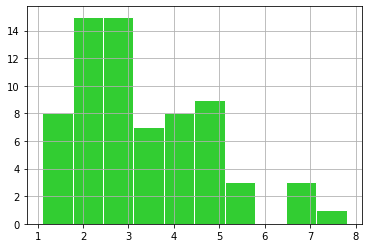

In [36]:
# color – цвет заливки, edgecolor – цвет границ столбцов
df["diffc"].hist(color = "limegreen", edgecolor = "white")

Выберем самые сложности новости – посмотрим, к каким рубрикам они относятся:

In [37]:
df[df["diffc"] > 6]

,title,author,date,diffc,rubrics,text
57,Палеогенетики нашли предков ямников на Среднем...,2024-01-10,Михаил Подрезов,6.5,Антропология,Палеогенетики прочитали 317 геномов древних ев...
59,В Китае успешно клонировали макака-резуса. На ...,2024-01-16,Олег Лищук,6.9,"Биология, Зоология, Медицина",Китайские исследователи усовершенствовали техн...
60,Соль замещенного циклопентадиенильного катиона...,2024-01-17,Михаил Бойм,7.1,Химия,Химики из Германии синтезировали соль антиаром...
63,Эксперимент CONUS пока не увидел рассеяния ант...,2024-01-22,Дмитрий Рудик,7.8,Физика,Немецкие ученые из эксперимента CONUS пока не ...


**Сюжет 2. Выбор новостей по рубрикам.** Если мы хотим выбрать новости, которые относятся к какой-то рубрике и только к ней, проблем не возникает:

In [38]:
df[df["rubrics"] == "Медицина"]

,title,author,date,diffc,rubrics,text
0,Австралийских комаров-кусак обвинили в распрос...,2024-01-27,Слава Гоменюк,3.2,Медицина,Австралийские ученые провели обширный анализ р...
1,Нейросеть научили определять симметричность гр...,2024-01-27,Олег Лищук,1.5,Медицина,Испанские исследователи обучили нейросеть с вы...
2,Снижение веса сохранилось через год после курс...,2024-01-27,Олег Лищук,1.8,Медицина,Американские исследователи проанализировали ба...
7,Бупренорфин вызвал меньше врожденных пороков п...,2024-01-26,Слава Гоменюк,2.9,Медицина,Когортное исследование более 13 тысяч беременн...
9,Купание в холодной воде облегчило симптомы мен...,2024-01-26,Слава Гоменюк,2.5,Медицина,Ученые опросили более тысячи женщин и выяснили...
11,Письмо от руки связали с формированием памяти ...,2024-01-26,Слава Гоменюк,3.4,Медицина,Небольшое исследование норвежских ученых показ...
15,Закрытие крышки унитаза не повлияло на распрос...,2024-01-26,Олег Лищук,1.4,Медицина,Американские исследователи провели микробиолог...
21,Рождение с 32 по 36 неделю связали с повышенны...,2024-01-25,Слава Гоменюк,2.4,Медицина,Когортное исследование более миллиона шведских...
24,Терапия расстройств настроения снизила уровень...,2024-01-25,Слава Гоменюк,3.1,Медицина,Систематический обзор и метаанализ 28 исследов...
25,За 20 лет доля смертей от СПИДа снизилась на 3...,2024-01-25,Слава Гоменюк,2.7,Медицина,Анализ 17 североамериканских и европейских рее...


Проблемы возникают тогда, когда новость относится к разным рубрикам, потому что тут уже нужно проверять вхождение нужного слова в строку. Для этого пригодится метод `.contains()`, который скрыт внутри набора методов `str` для строк, он проверяет вхождение подстроки в строку и возвращает `True` или `False` как обычное условие: 

In [39]:
df[df["rubrics"].str.contains("Медицина")]

,title,author,date,diffc,rubrics,text
0,Австралийских комаров-кусак обвинили в распрос...,2024-01-27,Слава Гоменюк,3.2,Медицина,Австралийские ученые провели обширный анализ р...
1,Нейросеть научили определять симметричность гр...,2024-01-27,Олег Лищук,1.5,Медицина,Испанские исследователи обучили нейросеть с вы...
2,Снижение веса сохранилось через год после курс...,2024-01-27,Олег Лищук,1.8,Медицина,Американские исследователи проанализировали ба...
7,Бупренорфин вызвал меньше врожденных пороков п...,2024-01-26,Слава Гоменюк,2.9,Медицина,Когортное исследование более 13 тысяч беременн...
9,Купание в холодной воде облегчило симптомы мен...,2024-01-26,Слава Гоменюк,2.5,Медицина,Ученые опросили более тысячи женщин и выяснили...
11,Письмо от руки связали с формированием памяти ...,2024-01-26,Слава Гоменюк,3.4,Медицина,Небольшое исследование норвежских ученых показ...
14,Универсальный интерфейс поможет конструировать...,2024-01-26,Олег Лищук,4.4,"Технологии, IT, Медицина, Биология, Гаджеты",Американские исследователи разработали масштаб...
15,Закрытие крышки унитаза не повлияло на распрос...,2024-01-26,Олег Лищук,1.4,Медицина,Американские исследователи провели микробиолог...
21,Рождение с 32 по 36 неделю связали с повышенны...,2024-01-25,Слава Гоменюк,2.4,Медицина,Когортное исследование более миллиона шведских...
24,Терапия расстройств настроения снизила уровень...,2024-01-25,Слава Гоменюк,3.1,Медицина,Систематический обзор и метаанализ 28 исследов...


К слову, если рубрик несколько и мы ищем их по отдельности, будет полезен метод `.isin()`, он проверяет, входит ли значение в ячейке в список, который мы подали на вход:

In [40]:
# str уже не нужен

df[df["rubrics"].isin(["Зоология", "Физика"])]

,title,author,date,diffc,rubrics,text
8,Зоологи уличили афалин в нападениях на детеныш...,2024-01-26,Сергей Коленов,2.3,Зоология,"Зоологи обнаружили, что афалины регулярно взаи..."
10,Самцы сумчатых мышей отказались от сна ради ра...,2024-01-26,Катерина Петрова,2.5,Зоология,"Исследователи из Австралии, Нидерландов и Швей..."
18,Пары жуков сизифов эффективнее одиночек перене...,2024-01-26,Катерина Петрова,1.9,Зоология,Ученые из Швеции и Южной Африки наблюдали за н...
26,Повторяющиеся сексуальные неудачи снизили стре...,2024-01-25,Катерина Петрова,3.3,Зоология,"Ученые из Израиля, США и Швеции проверили, как..."
33,Самки белолицых капуцинов с острова Хикарон от...,2024-01-24,Катерина Петрова,2.1,Зоология,"Биологи из Германии попытались понять, почему ..."
48,Биологи помешали тиграм из зоопарка ходить туд...,2024-01-18,Катерина Петрова,1.8,Зоология,Биологи из Нидерландов смогли снизить частоту ...
52,Амурский тигр умылся и отдохнул на фоне Владив...,2024-01-04,Сергей Коленов,1.1,Зоология,"Автоматическая камера, установленная на вершин..."
63,Эксперимент CONUS пока не увидел рассеяния ант...,2024-01-22,Дмитрий Рудик,7.8,Физика,Немецкие ученые из эксперимента CONUS пока не ...
65,Вода и ниобат лития превратили красный свет в ...,2024-01-24,Артем Моськин,5.1,Физика,Китайские физики пропустили излучение сапфиров...


**Сюжет 3. Разделение рубрик на несколько столбцов.** Если нам для каких-то целей будет удобнее распределить рубрики по разным столбцам (одна рубрика – один столбец), можно воспользоваться методом `.split()`, который тоже хранится внутри набора `str`:

In [41]:
df["rubrics"].str.split(", ")

0                                        [Медицина]
1                                        [Медицина]
2                                        [Медицина]
3                     [Зоология, Экология и климат]
4                                      [Астрономия]
                          ...                      
64                                       [Геология]
65                                         [Физика]
66                                     [Астрономия]
67    [Технологии, IT, Медицина, Биология, Гаджеты]
68                                     [Астрономия]
Name: rubrics, Length: 69, dtype: object

По умолчанию метод `.split()` в `pandas`, как и в стандартном Python, возвращает список со строками, причём проделывает это для всех ячеек. Это не всегда удобно, при выгрузке в файл это все превратится в строки со скобками и запятыми. Добавим аргумент `expand`, который «растянет» содержимое список на столбцы:

In [42]:
df_rubs = df["rubrics"].str.split(", ", expand = True)
df_rubs

,0,1,2,3,4
0,Медицина,None,None,None,None
1,Медицина,None,None,None,None
2,Медицина,None,None,None,None
3,Зоология,Экология и климат,None,None,None
4,Астрономия,None,None,None,None
...,...,...,...,...,...
64,Геология,None,None,None,None
65,Физика,None,None,None,None
66,Астрономия,None,None,None,None
67,Технологии,IT,Медицина,Биология,Гаджеты


Максимальное число рубрик здесь пять, у новостей, которые относятся к меньшему числу рубрик стоят пустые значения (здесь `None` и `nan` равнозначны). Присвоим столбцам названия:

In [43]:
df_rubs.columns = ["rubric01", "rubric02", "rubric03", "rubric04", "rubric05"]

Объединим наш старый датафрейм `df` с `df_rubs` по столбцам (`axis = 1`, то есть приклеиваем данные из `df_rubs` справа, а не снизу в виде новых строк):

In [44]:
final = pd.concat([df, df_rubs], axis = 1)
final

,title,author,date,diffc,rubrics,text,rubric01,rubric02,rubric03,rubric04,rubric05
0,Австралийских комаров-кусак обвинили в распрос...,2024-01-27,Слава Гоменюк,3.2,Медицина,Австралийские ученые провели обширный анализ р...,Медицина,None,None,None,None
1,Нейросеть научили определять симметричность гр...,2024-01-27,Олег Лищук,1.5,Медицина,Испанские исследователи обучили нейросеть с вы...,Медицина,None,None,None,None
2,Снижение веса сохранилось через год после курс...,2024-01-27,Олег Лищук,1.8,Медицина,Американские исследователи проанализировали ба...,Медицина,None,None,None,None
3,Львы стали реже охотиться на зебр из-за распро...,2024-01-27,Сергей Коленов,4.1,"Зоология, Экология и климат","Ученые выяснили, что появление в Восточной Афр...",Зоология,Экология и климат,None,None,None
4,Георадар «Персеверанса» увидел древнюю эрозию ...,2024-01-26,Винера Андреева,4.6,Астрономия,Планетологи представили результаты анализа гео...,Астрономия,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
64,Землетрясения в Турции в феврале 2023 года про...,2024-01-23,Винера Андреева,5.7,Геология,Геологи исследовали механику разрушительного д...,Геология,None,None,None,None
65,Вода и ниобат лития превратили красный свет в ...,2024-01-24,Артем Моськин,5.1,Физика,Китайские физики пропустили излучение сапфиров...,Физика,None,None,None,None
66,Астрономы нашли следы вещества «звезды Барбиге...,2024-01-25,Александр Войтюк,5.5,Астрономия,Астрономы обнаружили следы вещества массивной ...,Астрономия,None,None,None,None
67,Универсальный интерфейс поможет конструировать...,2024-01-26,Олег Лищук,4.4,"Технологии, IT, Медицина, Биология, Гаджеты",Американские исследователи разработали масштаб...,Технологии,IT,Медицина,Биология,Гаджеты


In [45]:
final.to_csv("nplus1_upd.csv")